# Chapter14. Object-Oriented Programming

problem domain: keep tarck of booksin a bookstore
* book의 record에는 tiltle, authors, publisher,   
    price, ISBN(International Standard Book Number, a unique identifie)이 포함된다

In [1]:
python_book = Book(
    'Practical Programming',
    ['Campbell', 'Gries', 'Montojo'],
    'Pragmatic Bookshelf',
    '978-1-6805026-8-8',
    25.0)
survival_book = Book(
    "New Programmer's Survival Manual",
    ['Carter'],
    'Pragmatic Bookshelf',
    '978-1-93435-681-4',
    19.0)


NameError: name 'Book' is not defined

두개의 book Object를 생성하고 있다
1. Practical Programming
2. New Programmer's Survival Manual

In [2]:
print('{0} was written by {1} authors and costs ${2}'.format(python_book.title, python_book.num_authors(), python_book.price))
print('{0} was written by {1} authors and costs ${2}'.format(survival_book.title, survival_book.num_authors(), survival_book.price))

NameError: name 'python_book' is not defined

this code doesn’t run   

**then why?**
* Python doesn’t have a Book type

-> 이번 chapter의 목표: Learn how to define and use your own types.

## 1. Understanding a Problem Domain

The idea of a `Book` type comes from the problem domain: keeping track of books in a bookstore.

* Object-oriented programming은 new type을 지정&사용하는 것에 중점을 둔다
* class는 python이 나타내는 type이다

> **Object-oriented programming 단계**   
>1. Understanding the problem domain. 
    - This step is crucial
    - program을 짜기 전 고객이 원하는 것이 무엇인지 program의 목표가 뭔지를 알아야 한다    
>
>2. Figuring out what type(s) you might want
    - 처음 problem domain의 설명을 읽고, main nouns와 noun phrases를 찾는 것이 좋다
>
>3. Figuring out what features you want your type to have
    - code로 구현
        + ex) 
        ```
        python_book = Book('Practical Programming',
        ['Campbell', 'Gries', 'Montojo'],'Pragmatic Bookshelf',
        '978-1-6805026-8-8', 25.0)
        ```
    - function design recipe과 유사
>
>4. Writing a class that represents this type
    - 위에 구현한 code를 class를 사용해 methods로 표현해 type을 정의한다
>
>5. Testing your code
    - 다양한 method들이 잘 상호작용할지에 대해 검토하는 것이 중요합니다.

## 2. Function isinstance, Class object, and Class Book

`isinstance` function: 이 함수는 object가 class의 instance인지 출력한다
* object가 특정 type을 가지는 지 확인

In [2]:
isinstance('abc',str)

True

In [3]:
isinstance(55,str)

False

python은 `object`라는 class(type)을 갖는다

In [3]:
help(object)

Help on class object in module builtins:

class object
 |  The base class of the class hierarchy.
 |  
 |  When called, it accepts no arguments and returns a new featureless
 |  instance that has no instance attributes and cannot be given any.
 |  
 |  Built-in subclasses:
 |      async_generator
 |      BaseException
 |      builtin_function_or_method
 |      bytearray
 |      ... and 114 other subclasses
 |  
 |  Methods defined here:
 |  
 |  __delattr__(self, name, /)
 |      Implement delattr(self, name).
 |  
 |  __dir__(self, /)
 |      Default dir() implementation.
 |  
 |  __eq__(self, value, /)
 |      Return self==value.
 |  
 |  __format__(self, format_spec, /)
 |      Default object formatter.
 |  
 |  __ge__(self, value, /)
 |      Return self>=value.
 |  
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |  
 |  __gt__(self, value, /)
 |      Return self>value.
 |  
 |  __hash__(self, /)
 |      Return hash(self).
 |  
 |  __init__(self, /, *args, 

'abc'와 55.2는 `object` class에 속한다

In [4]:
isinstance('abc',object)

True

In [5]:
isinstance(55.2, object)

True

str, max와 같은 class와 function도 `object`의 instance이다

In [5]:
isinstance(str, object)

True

In [6]:
isinstance(max, object)

True

In [6]:
a=7
isinstance(a, int)

True

**every class in Python is derived from class `object`, and so every instance of every class is an object.**

* `object`는 str class의 *superclass*이고 `str` class는 object의 *subclass*라 말할 수 있다.
* superclass의 정보는 `help` documentation에서 볼 수 있다

In [8]:
help(int)

Help on class int in module builtins:

class int(object)
 |  int([x]) -> integer
 |  int(x, base=10) -> integer
 |  
 |  Convert a number or string to an integer, or return 0 if no arguments
 |  are given.  If x is a number, return x.__int__().  For floating point
 |  numbers, this truncates towards zero.
 |  
 |  If x is not a number or if base is given, then x must be a string,
 |  bytes, or bytearray instance representing an integer literal in the
 |  given base.  The literal can be preceded by '+' or '-' and be surrounded
 |  by whitespace.  The base defaults to 10.  Valid bases are 0 and 2-36.
 |  Base 0 means to interpret the base from the string as an integer literal.
 |  >>> int('0b100', base=0)
 |  4
 |  
 |  Built-in subclasses:
 |      bool
 |  
 |  Methods defined here:
 |  
 |  __abs__(self, /)
 |      abs(self)
 |  
 |  __add__(self, value, /)
 |      Return self+value.
 |  
 |  __and__(self, value, /)
 |      Return self&value.
 |  
 |  __bool__(self, /)
 |      self != 

In [6]:
# SyntaxError is a subclass of Exception
help(SyntaxError)

Help on class SyntaxError in module builtins:

class SyntaxError(Exception)
 |  Invalid syntax.
 |  
 |  Method resolution order:
 |      SyntaxError
 |      Exception
 |      BaseException
 |      object
 |  
 |  Built-in subclasses:
 |      IndentationError
 |  
 |  Methods defined here:
 |  
 |  __init__(self, /, *args, **kwargs)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  __str__(self, /)
 |      Return str(self).
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  filename
 |      exception filename
 |  
 |  lineno
 |      exception lineno
 |  
 |  msg
 |      exception msg
 |  
 |  offset
 |      exception offset
 |  
 |  print_file_and_line
 |      exception print_file_and_line
 |  
 |  text
 |      exception text
 |  
 |  ----------------------------------------------------------------------
 |  Static methods inherited from Exception:
 |  
 |  __new__(*args, **kwargs) fr

object의 arrtributes들

In [11]:
dir(object)

['__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__']

>**NOTE**   
>사용자가 정의하는 class를 포함하여 python의 모든 class는 위의 object attribute의 속성들을 자동으로 갖고 있다
>* 일반적으로 모든 sub class는 superclass의 기능을 가진다

In [9]:
class Book:
    """Information about a book."""

In [10]:
type(str)

type

In [11]:
type(Book)

type

`def`가 python에 새로운 function을 정의한다고 말하듯이, `class`는 우리가 새로운 type을 정의한다는 것을 말한다

In [46]:
dir(Book)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__']

In [47]:
set(dir(Book))-set(dir(object))

{'__dict__', '__module__', '__weakref__'}

Book class에는 3개의 추가 attribution이 있다
* class object 중 subclass라면 위3가지 attribution은 자동 포함한다

In [12]:
help(Book)

Help on class Book in module __main__:

class Book(builtins.object)
 |  Information about a book.
 |  
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the object (if defined)



In [22]:
ruby_book=Book() #Book 개체 생성 후 ruby_book에 할당
ruby_book.title='Programming Ruby' # Book 개체 내 제목 변수 생성
ruby_book.authors=['Thomas','Fowler','Hunt'] #Book 개체 내 작가 변수 생성

title과 authors는 class의 instance 내 변수이므로 `instance variable`이라 칭한다

> ruby_book이라는 Book 개체를 통해 이러한 instance 변수에 접근할 수 있다

In [23]:
ruby_book.title

'Programming Ruby'

In [24]:
ruby_book.authors

['Thomas', 'Fowler', 'Hunt']

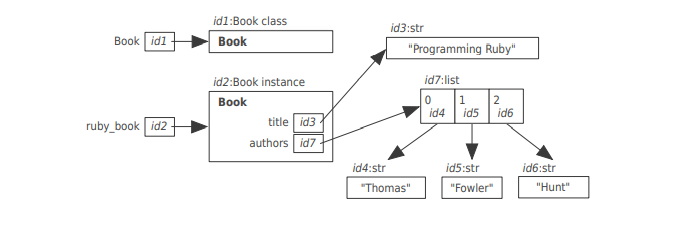

ruby_book.title이라 치면 python 내에서 어떤 과정이 일어날까?
1. python은 variable `ruby_book`을 찾는다
2. dot을 읽고서 Book object의 memory location으로 간다
4. 그리고 그 안에서 title instance를 찾는다

In [15]:
help(ruby_book)

Help on Book in module __main__ object:

class Book(builtins.object)
 |  Information about a book.
 |  
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the object (if defined)



## 3. Writing a Method in  Class Book

>**Using Method**
>1. ` str.capitalize('browning')`
>2. `'browning.capitalize()'`


In [17]:
#:\Users\whbom\projectspace\ownstudy\Python\boook.py
class Book:
    """Information about a book."""
    
    def num_authors(self) -> int:
        """Return the number of authors oof this book"""
        
        return len(self.authors)

In [18]:
help(Book)

Help on class Book in module __main__:

class Book(builtins.object)
 |  Information about a book.
 |  
 |  Methods defined here:
 |  
 |  num_authors(self) -> int
 |      Return the number of authors oof this book
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the object (if defined)



class 내 def는 book을 refer하는 self라는 매개변수가 있다는 점을 제외하면 function과 같다

In [19]:
Book.num_authors(ruby_book)

3

In [25]:
ruby_book.num_authors()

3

In [4]:
from ch14 import book

In [5]:
ruby_book2=book.Book()

In [6]:
ruby_book2.title='Programming'
ruby_book2.authors=['Thomas', 'Fowler', 'Hunt']

**call on class of method 2 way**

In [7]:
book.Book.num_authors(ruby_book2)

3

* look in the imported module
* In that module is class Book.
* Inside Book is method num_authors. 
* The argument to the call, ruby_book, is passed to parameter self.

In [8]:
ruby_book2.num_authors()

3

In [9]:
help(ruby_book2)

Help on Book in module ch14.book object:

class Book(builtins.object)
 |  Information about a book.
 |  
 |  Methods defined here:
 |  
 |  num_authors(self) -> int
 |      Return the number of authors of this book.
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the object (if defined)



* it lists the object first; object를 먼저 나열 

Thinking of method calls this way can really help develop an object-oriented mentality.


### `__init__`

ruby_book 예제에서는 Book개체가 생성된 후 제목과 저서 값을 할당
* special meathod
* 문제발생! 이러한 접근 class가 확장 가능하지 않다
    +  즉, book을 만들때 마다 추가 문장을 입력해야함
* 따라서, 대신  __init__ 방법을 사용해 class를 작성해볼 것임
    + doctest와 마찬가지로 debugging 작업 가능
    + class 속 매개변수이므로 first parameter의 type을 지정하지 않아도 된다
    + When Python executes this module, it creates a class object and assigns it to variable class(Book)
    + method init은 Book object가 생성될 때마다 호출
        -  Its purpose is to initialize the new object; *constructor method*


In [ ]:
from typing import List, Any
class Book:
    """Information about a book, including title, list of authors,
    publisher, ISBN, and price.
    """
    def __init__(self, title: str, authors: List[str], publisher: str,
                 isbn: str, price: float) -> None:
        """Create a new book entitled title, written by the people in authors,
        published by publisher, with ISBN isbn and costing price dollars.
        >>> python_book = Book( \
        'Practical Programming', \
        ['Campbell', 'Gries', 'Montojo'], \
        'Pragmatic Bookshelf', \
        '978-1-6805026-8-8', \
        25.0)
        >>> python_book.title
        'Practical Programming'
        >>> python_book.authors
        ['Campbell', 'Gries', 'Montojo']
        >>> python_book.publisher
        'Pragmatic Bookshelf'
        >>> python_book.ISBN
        '978-1-6805026-8-8'
        >>> python_book.price
        25.0
        """
        self.title = title
        # Copy the authors list in case the caller modifies that list later.
        self.authors = authors[:]
        self.publisher = publisher
        self.ISBN = isbn
        self.price = price

    def num_authors(self) -> int:
        """Return the number of authors of this book.
        >>> python_book = Book( \
        'Practical Programming', \
        ['Campbell', 'Gries', 'Montojo'], \
        'Pragmatic Bookshelf', \
        '978-1-6805026-8-8', \
        25.0)
        >>> python_book.num_authors()
        3
        """
        return len(self.authors)

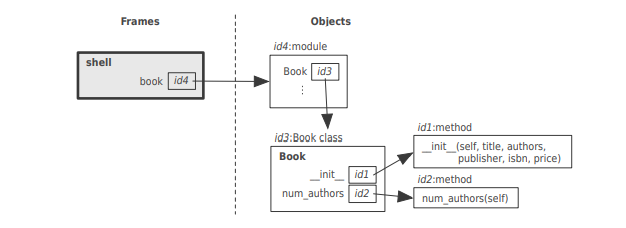

python 내 __init__ object 생성 수행 단계;
1. 특정 memory address에 object 생성
2. method init을 통해 새 object를 `self` parameter에 전달함
3. 그 object의 memory 주소 생성

In [11]:
from ch14 import book2

In [22]:
help(book2)

Help on module book2:

NAME
    book2

CLASSES
    builtins.object
        Book
    
    class Book(builtins.object)
     |  Book(title: str, authors: List[str], publisher: str, isbn: str, price: float) -> None
     |  
     |  Information about a book, including title, list of authors,
     |  publisher, ISBN, and price.
     |  
     |  Methods defined here:
     |  
     |  __init__(self, title: str, authors: List[str], publisher: str, isbn: str, price: float) -> None
     |      Create a new book entitled title, written by the people in authors,
     |      published by publisher, with ISBN isbn and costing price dollars.
     |      >>> python_book = Book(         'Practical Programming',         ['Campbell', 'Gries', 'Montojo'],         'Pragmatic Bookshelf',         '978-1-6805026-8-8',         25.0)
     |      >>> python_book.title
     |      'Practical Programming'
     |      >>> python_book.authors
     |      ['Campbell', 'Gries', 'Montojo']
     |      >>> python_book.pu

In [12]:
python_book=book2.Book('Practical Programming',['Campbell', 'Gries', 'Montojo'],
                       'Pragmatic Bookshelf','978-1-6805026-8-8', 25.0)

In [15]:
python_book.title

'Practical Programming'

In [16]:
python_book.publisher

'Pragmatic Bookshelf'

## <What's in an Object?>

* method는 class에 속한다
* instance variable은 object에 속한다

In [18]:
book2.Book.title

AttributeError: type object 'Book' has no attribute 'title'

instance variable에 method로 접근하려하면 error가 뜬다   
따라서 instance를 통해 variable을 포함하며 Book의 method에 접근할 수 있다

In [29]:
dir(book2.Book)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'num_authors']

In [19]:
python_book=book2.Book('Practical Programming',['Campbell', 'Gries', 'Montojo'],
                       'Pragmatic Bookshelf','978-1-6805026-8-8', 25.0)

In [20]:
dir(python_book)

['ISBN',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'authors',
 'num_authors',
 'price',
 'publisher',
 'title']

In [33]:
set(dir(python_book))-set(dir(book2.Book))


{'ISBN', 'authors', 'price', 'publisher', 'title'}

In [21]:
python_book.title

'Practical Programming'

cf) class variable

Notice that ISBN, authors, price, publisher, and title are all available in the object as instance
variables in addition to the contents of class Book

1. python은 먼저 python_book이 refer하는 object를 찾고 method num_authodrs를 호출

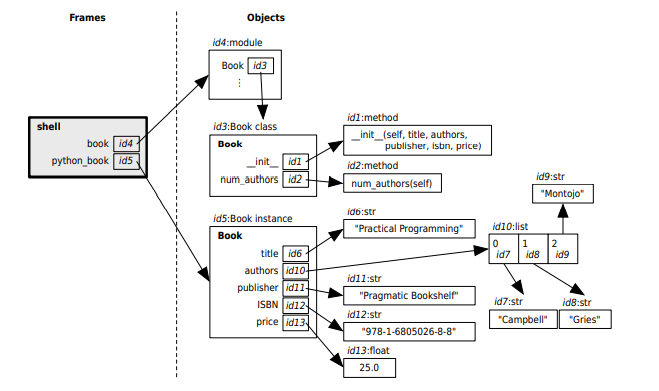


2. 명시적 instance가 없으므로 python_book이 refer하는 Book object에만 전달해 해당 object를 self parameter에 할당

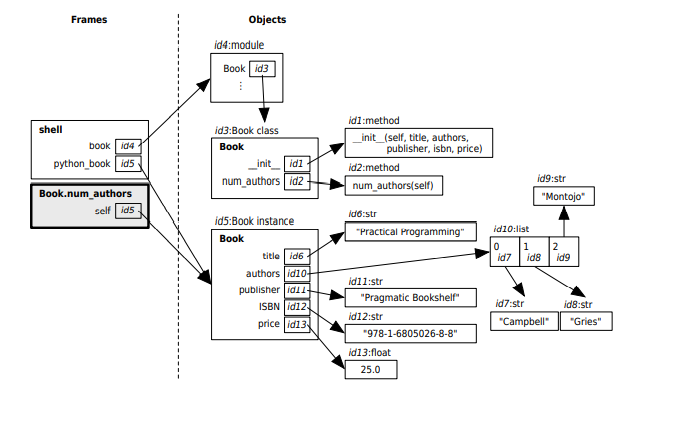

3. return statement에서는 len(self.authors)을 반환
    + authors가 refer하는 object 속 instance variable authors를 찾는다 

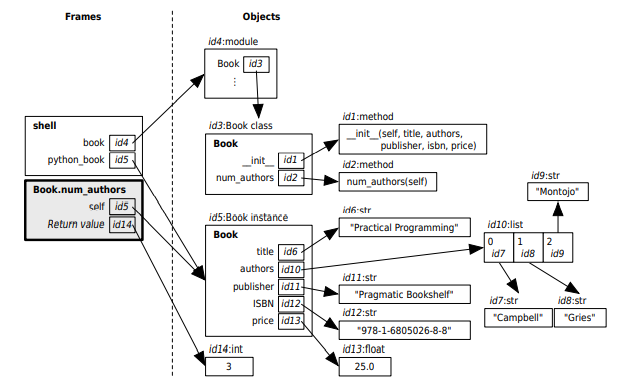

4. `list`의 길이 return

With constructors, methods, and instance variables in hand, we can now create
classes that look and work like those that come with Python itself.

In [28]:
python_book.num_authors() # Book.num_authors(python_book)

3

## 4. Plugging into Python Syntax: More Special Methods

123p에서 `+`나 `in`같은 python구문이 method 호출을 작동시킴을 보았다

In [30]:
'abc' + '123' #'abc'.__add__('123')

'abc123'

In [31]:
'abc'.__add__('123')

'abc123'

In [34]:
print("Hi")

Hi


In [36]:
'Hi'.__str__()

'Hi'

In [32]:
python_book=book2.Book('Practical Programming',['Campbell', 'Gries', 'Montojo'],
                       'Pragmatic Bookshelf','978-1-6805026-8-8', 25.0)

In [37]:
# object가 memory에 있는 위치만 print됨
# class에 method __str__에 정의
print(python_book)

In [23]:
help(print)

Help on built-in function print in module builtins:

print(...)
    print(value, ..., sep=' ', end='\n', file=sys.stdout, flush=False)
    
    Prints the values to a stream, or to sys.stdout by default.
    Optional keyword arguments:
    file:  a file-like object (stream); defaults to the current sys.stdout.
    sep:   string inserted between values, default a space.
    end:   string appended after the last value, default a newline.
    flush: whether to forcibly flush the stream.



위 shell은 object를 문자열로 변환하기 위함

>`__str__`   
>__str__ is called when an informal, human-readable version
>* 특히, called when `print` is used
>* `__str__`과 string method인 `format`으로 호출되기도 한다

In [ ]:
def __str__(self) -> str:
        """Return a human-readable string representation of this Book."""
        return  """Title: {0}
        Authors: {1}
        Publisher: {2}
        ISBN: {3}
        Price: ${4}""".format(self.title, 
                              ', '.join(self.authors), 
                              self.publisher, self.ISBN, self.price)

In [25]:
from ch14 import book3

In [26]:
bom_book=book3.Book('우한봄 자서전',['우', '한', '봄'],
                       '봄 출판사','978-1-6805026-8-8', 25.0)

In [27]:
print(bom_book)

Title: 우한봄 자서전
        Authors: 우, 한, 봄
        Publisher: 봄 출판사
        ISBN: 978-1-6805026-8-8
        Price: $25.0


>`__repr__`   
>__repr__  is called when unambiguous, but possibly less readable, output is desired
>* python shell에서 value of a variable을 요청하면 호출
>* it is also called when a collection such as `list` is printed.
>* ㅑf we were to evaluate the string, __repr__을 소유한 object 생성

In [28]:
a=7

In [29]:
a

7

> `__eq__`    
> The operator == triggers a call on method `__eq__`
>* 이 method는 class 개체에 정의되어 있으므로 클래스 Book는 method를 가지게 된다
    + object’s __eq__는 object가 자신과 비교될 때 True 생성
        - 즉, 두 object가 동일한 정보를 포함하더라도 object객체가 다르다면 동일하게 간주하지 않음 

In [31]:
bom_book1=book3.Book('우한봄 자서전',['우', '한', '봄'],
                       '봄 출판사','978-1-6805026-8-8', 25.0)

In [32]:
bom_book2=book3.Book('우한봄 자서전',['우', '한', '봄'],
                       '봄 출판사','978-1-6805026-8-8', 25.0)

In [35]:
bom_book1.__eq__(bom_book2) # 접근권한이 없다

NotImplemented

In [51]:
bom_book1==bom_book2

False

In [52]:
bom_book1==bom_book1

True

In [53]:
bom_book2==bom_book2

True

In [ ]:
def __eq__(self, other: Any) -> bool:
    """Return True iff other is a book, and this book and other have
    the same ISBN.
    >>> python_book = Book( \
        'Practical Programming', \
        ['Campbell', 'Gries', 'Montojo'], \
        'Pragmatic Bookshelf', \
        '978-1-6805026-8-8', \
        25.0)
    >>> python_book_discounted = Book( \
        'Practical Programming', \
        ['Campbell', 'Gries', 'Montojo'], \
        'Pragmatic Bookshelf', \
        '978-1-6805026-8-8', \
        5.0)
    >>> python_book == python_book_discounted
    True
    >>> python_book == ['Not', 'a', 'book']
    False
    """
    return isinstance(other, Book) and self.ISBN == other.ISBN



In [41]:
import book4

In [42]:
bom_book1=book4.Book('우한봄 자서전',['우', '한', '봄'],
                       '봄 출판사','978-1-6805026-8-8', 25.0)

In [57]:
bom_book2=book4.Book('우한봄 자서전',['우', '한', '봄'],
                       '봄 출판사','978-1-6805026-8-8', 25.0)

In [43]:
survival_book = book4.Book("New Programmer's Survival Manual", ['Carter'],
                           'Pragmatic Bookshelf', '978-1-93435-681-4', 25.0)


In [59]:
bom_book1==bom_book2

True

In [44]:
bom_book1==survival_book

False

In [62]:
bom_book1 == ['Not', 'a', 'book']

False

### lookup rules for a method call; obj.method()
1. 현재 object class를 찾는다. 거기에 우리가 쓸 method name이 있다면 그냥 그걸 써라
2. 찾지 못했다면, method를 찾을 때까지 superclass를 찾아보는 과정을 반복해라

## 5. A Little Bit of OO Theory

`class`와 `object`는 2가지의 power tool이다
- 아주 짧은 시간안에 많은 것을 하도록 해주지만
- 신뢰할 수 있고 재사용 가능한 `object`를 만들기 위해서 몇가지 이론을 따라야 한다

### 1)Encapsulation
something means to encloose it in some kind of container
- data 및 data를 사용하는 code를 한 곳에 보관하고 이들이 정확히 어떨게 함께 작동하는지에 대한 세부사항은 main code에서 숨기는 것을 의미한다
    + ex) class 파일의 instance는 디스크의 어떤 파일을 읽거나 쓰고 있으며 현재 파일의 어디에 있는 추적한다
    + class는 프로그래머들이 어떻게 구현되어있는 세부정보를 알필요 없도록 숨긴다

### What are thoses special attributes

evety class that you have defined contatins these four attributes
1. `__dict__`
    - instance variable와 해당 값을 추적하는 데 사용한다
    - instance variable에 할당할 때 마다, dictionary의 내용이 변경된다
        + 직접 변경할 수 있지만 권장하지 않는다
        

In [1]:
python_book.__dict__


NameError: name 'python_book' is not defined

2. `__module__`
    - object의 class가 있었던 모듈 module object를 나타낸다

3. `__weakref__`
    - python에서 object의 memory를 재사용할 수 있는 시기를 관리
    - used by Python to manage when the memory for an object can be reused.
    
4. `__name__`, `___qualname_`
    - 각각 class의 정규화된 이름을 포함하는 문자열을 참조
    - class가 다른 class 내에 정의된 경우를 제외하고 해당 값은 보통 동일
    
5. `__class__`
    - object의 class object를 나타냄

### 2) Polymorphism

means “having more than one form.” In programming
- programming에서 variable을 포함하는 식은 변수가 참조하는 object의 type에 따라 다른 작업을 수 있다
    + ex) 1.if `obj` refers to a string, then obj[1:3] produces a two-character string.
    + 2.If `obj`refers to a list, the same expression produces a two-element list. 
    + 3. `left`, `right`의 type에 따라, `left+right`는 number or string or list가 될 수 있다
- programmer들이 쓰고 테스트하는데 필요한 코드의 양을 줄이기 위해 사용 

In [1]:
def non_blank_lines(thing):
    """Return the number of nonblank lines in thing."""
    count = 0
    for line in thing:
        if line.strip():
            count += 1
        return count


we can apply it to a list of strings, a file, or a web page on a site
- 이 3가지의 type들은 loop의 subject가 된다
    + each one knows how to produce its “next” element as long as there is one and then say “all done.” 
    + 즉, 4개의 함수를 사용해 line을 list로 복사한 후, 해당 list에 한 기능을 적용하는 것 대신, **모든 type에 대해 한 기능을 직접 적용할 수 있다**

### 3) Inheritance

한 class에 다른 class와 동일한 method를 제공하는 것은 polymorphic이지만,    
object의 instance variable을 외부에서 초기화하는 결함이 있다
- programmer가 code 한줄만 잊으면 전체 program을 추적하기 어려워 실패할 수 있다


따라서 class를 만들 때 마다 inherutate, 즉 상속을 사용해 code를 재활용 할 수 있다
- new class에서 class `object`의 모든 attribution을 자동으로 상속받는다
    + 마치 아이가 부모에게서 속성을 상속받듯이
- 또한,, new class가 다른 class의 subclass임을 선언할 수 있다

ex) 학생과 교수진을 `Faculty`class와 `student`class을 이용한 program을 통해 관리
- 학생과 교수진 모두; 이름, 우편주소, email 주소를 가짐
    + 중복 code는 일반적으로 좋지 않기 떄문에, `Member`라는 class를 정의할 것
    + 이후 `student`와 `Faculty`라는 subclass를 만듬
- `student`: student number, 수가한 과정 목록, 현재 수강중인 과정 목록
- `Faculty`: 현재 강의 중인 강의 목록, faculty number

In [2]:
class Member:
    """ A member of a university. """
    def __init__(self, name: str, address: str, email: str) -> None:
        """Create a new member named name, with home address and email address.
        """
        self.name = name
        self.address = address
        self.email = email

In [3]:
class Faculty(Member):
    """ A faculty member at a university. """
    def __init__(self, name: str, address: str, email: str,faculty_num: str) -> None:
        """Create a new faculty named name, with home address, email address,
        faculty number faculty_num, and empty list of courses.
        """
        super().__init__(name, address, email)
        self.faculty_number = faculty_num
        self.courses_teaching = []
class Student(Member):
    """ A student member at a university. """
    def __init__(self, name: str, address: str, email: str,student_num: str) -> None:
        """Create a new student named name, with home address, email address,
        student number student_num, an empty list of courses taken, and an
        empty list of current courses.
        """
        super().__init__(name, address, email)
        self.student_number = student_num
        self.courses_taken = []
        self.courses_taking = []

`Faculty`class와 `Student` class 모두 `Member`의 subclass임을 알 수 있다
- 즉, `Member`의 모든 attributes를 inherit받는다

>`__init__`
>`Faculty.__init__` and `Student.__init__`은 두 class의 superclass를 attributes를 참조한다 

In [3]:
paul = Faculty('Paul Gries', 'Ajax', 'pgries@cs.toronto.edu', '1234')

In [4]:
paul.name

'Paul Gries'

In [5]:
paul.email

'pgries@cs.toronto.edu'

In [6]:
paul.faculty_number

'1234'

In [7]:
jen = Student('Jen Campbell', 'Toronto', 'campbell@cs.toronto.edu','4321')


In [8]:
jen.name


'Jen Campbell'

In [9]:
jen.email

'campbell@cs.toronto.edu'

In [10]:
jen.student_number

'4321'

Both the Faculty and Student objects have inherited the features defined in class
`Member`.


-> class code를 확장하고 싶을 떄, ex)` _str_`

In [2]:
class Member:
    """ A member of a university. """
    def __init__(self, name: str, address: str, email: str) -> None:
        """Create a new member named name, with home address and email address.
        """
        self.name = name
        self.address = address
        self.email = email
    
    def __str__(self) -> str:
        """Return a string representation of this Member.
        >>> member = Member('Paul', 'Ajax', 'pgries@cs.toronto.edu')
        >>> member.__str__()
        'Paul\\nAjax\\npgries@cs.toronto.edu'
        """
        return '{}\n{}\n{}'.format(self.name, self.address, self.email)

In [4]:
paul = Faculty('Paul', 'Ajax', 'pgries@cs.toronto.edu', '1234')

In [5]:
str(paul)

'Paul\nAjax\npgries@cs.toronto.edu'

In [6]:
print(paul)

Paul
Ajax
pgries@cs.toronto.edu


We’ll use super again to access the inherited Member.
__str__ method and to append the Faculty-specific information

In [7]:
class Member:
    """ A member of a university. """
    def __init__(self, name: str, address: str, email: str) -> None:
        """Create a new member named name, with home address and email address.
        """
        self.name = name
        self.address = address
        self.email = email
    
    def __str__(self) -> str:
        """Return a string representation of this Faculty.
        >>> faculty = Faculty('Paul', 'Ajax', 'pgries@cs.toronto.edu', '1234')
        >>> faculty.__str__()
        'Paul\\nAjax\\npgries@cs.toronto.edu\\n1234\\nCourses: '
        """
        member_string = super().__str__()
        return '''{}\n{}\nCourses: {}'''.format(member_string,self.faculty_number,
                                                ' '.join(self.courses_teaching))

In [8]:
paul = Faculty('Paul', 'Ajax', 'pgries@cs.toronto.edu', '1234')

In [9]:
str(paul)


'Paul\nAjax\npgries@cs.toronto.edu'

In [10]:
print(paul)


Paul
Ajax
pgries@cs.toronto.edu


## 6. A Case Study: Molecules, Atoms, and PDB Files

## 7. Classifying What You've Learned